# PETCA - Projeto de Análise de Contas de Energia com Aprendizado de Máquina e Redes Neurais

## Índice
- [Modelos Utilizados](#modelos-utilizados)
- [Importando Pacotes e Bibliotecas](#importando-os-pacotes-e-bibliotecas)
- [Importando os Datasets](#importando-os-datasets)
- [Análise Inicial dos Datasets](#análise-inicial-dos-datasets)
- [Análise Exploratória dos Dados](#aed)
- [Criando os Modelos](#criando-os-modelos)
- [Treinando os Modelos](#treinando-os-modelos)
- [Resultados os Modelos](#resultados-dos-modelos)
    - [Realização dos Testes](#testes)
    - [Qualidade dos Modelos](#qualidade-dos-testes-e-resultados)
- [Discussão](#discussão)

## Modelos Utilizados
- Árvore de Decisão (Decision Tree)
- Ensemble
- Floresta Randômica (Random Forest)
- Redes Neurais Convolucionais
- Regressão Linear
- Regressão Polinomial
- Support Vector Machine (SVM)

## Importando os pacotes e bibliotecas

In [1]:
# biblioteca para realizar o corte teste | treino
from sklearn.model_selection import train_test_split

# bibliotecas de classificacao
## Floresta Randomica;
## Arvore de Decisao; e
## Support Vector Machine (SVM).
from sklearn.ensemble  import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# biblioteca de modelos polinomiais
from sklearn.preprocessing import PolynomialFeatures

# biblioteca de modelos lineares
## Regressao Linear; e
## Support Vector Machine (SVM).
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# bibliotecas de suporte -----
## Impressao de Graficos
from matplotlib import pyplot as plt
import seaborn as sns

## Bibliotecas Base
import pandas as pd
import numpy as np
# ----------------------------

# bibliotecas e pacotes do TensorFlow
## Redes Neurais Convolucionais
import tensorflow as tf
from keras import layers, models

2024-07-30 18:29:17.065030: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-30 18:29:17.153507: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 18:29:17.153590: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 18:29:17.183606: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-30 18:29:17.210896: I tensorflow/core/platform/cpu_feature_gua

## Importando os datasets

In [2]:
df_residencial_raw = pd.read_csv("./databases/raw/CONSUMO MENSAL DE ENERGIA ELÉTRICA POR CLASSE - CONSUMO COMERCIAL POR UF.csv", sep = ",", index_col = 0)

## Análise Inicial dos Datasets

### Consumo Residencial por UF

In [3]:
df_residencial_raw.sample(10)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252
Empresa de Pesquisa Energética - EPE,,,,,,,,,,,,,,,,,,,,,
Rio Grande do Sul,276.902,285.451,283.818,297.774,266.991,245.687,251.824,248.318,251.759,248.016,...,535.528,506.310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paraíba,35.917,32.453,34.378,35.924,33.864,33.950,32.155,31.641,35.194,34.712,...,94.813,96.817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOTAL POR UF,4.244.837,4.147.275,4.203.863,4.447.075,4.105.720,3.840.001,3.887.234,3.867.268,4.121.321,4.187.990,...,9.106.592,9.043.976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paraná,257.033,269.481,268.151,275.652,267.628,239.079,238.401,249.298,264.561,255.562,...,702.042,663.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alagoas,31.461,30.119,30.572,32.021,30.512,31.649,27.614,27.011,29.066,29.911,...,89.432,86.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mato Grosso,64.699,65.905,74.538,77.146,68.100,61.587,66.190,62.202,69.190,72.326,...,164.770,161.940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tocantins,13.832,12.160,13.819,14.883,15.465,16.111,14.775,15.815,17.041,16.450,...,43.354,45.082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Consumo de energia elétrica na rede (MWh),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Quantidade de valores nulos

In [4]:
df_residencial_transposto = df_residencial_raw.transpose()
df_residencial_transposto.sample(10)

Empresa de Pesquisa Energética - EPE,Consumo de energia elétrica na rede (MWh),Sistema SIMPLES,NaN,NaN,NaN,TOTAL POR UF,Rondônia,Acre,Amazonas,Roraima,...,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal,Nota: atualização defasada para não antecipar informações de distribuidoras que devem obedecer às intruções da CVM sobre publicação de resultados.
Unnamed: 65,NaN,NaN,NaN,NaN,MAI,5.247.517,35.065,10.146,68.214,9.412,...,661.512,1.741.810,341.377,224.687,331.192,62.268,91.091,148.166,125.533,NaN
Unnamed: 105,NaN,NaN,NaN,NaN,SET,6.501.886,53.424,17.132,99.563,12.272,...,755.483,2.177.204,446.969,267.117,385.231,87.854,115.325,178.990,161.132,NaN
Unnamed: 189,NaN,NaN,NaN,NaN,SET,7.244.462,64.484,23.663,116.658,17.795,...,776.396,2.301.143,490.038,312.158,360.334,101.119,159.211,219.776,169.708,NaN
Unnamed: 192,NaN,NaN,NaN,NaN,DEZ,8.047.980,60.574,22.637,118.943,18.629,...,869.860,2.581.117,522.014,384.836,451.430,112.140,156.339,214.093,169.433,NaN
Unnamed: 47,NaN,NaN,NaN,NaN,NOV,5.105.641,32.055,10.364,67.081,8.454,...,654.176,1.742.436,325.043,202.128,305.413,57.993,82.424,124.089,116.077,NaN
Unnamed: 106,NaN,NaN,NaN,NaN,OUT,6.591.504,52.966,18.205,104.020,13.319,...,799.540,2.155.608,428.319,271.374,374.075,86.281,126.938,186.633,164.709,NaN
Unnamed: 110,NaN,NaN,NaN,NaN,FEV,7.035.408,44.797,15.342,94.184,11.742,...,874.686,2.292.030,472.142,337.610,458.756,93.852,117.444,178.412,165.196,NaN
Unnamed: 9,NaN,NaN,NaN,NaN,SET,4.121.321,25.980,8.309,55.148,5.652,...,537.621,1.430.716,264.561,148.465,251.759,51.954,69.190,97.105,98.068,NaN
Unnamed: 88,NaN,NaN,NaN,NaN,ABR,6.297.738,42.438,12.023,78.143,10.573,...,783.202,2.101.063,423.852,265.717,389.908,80.671,107.986,163.446,159.716,NaN
Unnamed: 6,NaN,NaN,NaN,NaN,JUN,3.840.001,24.112,6.955,50.734,5.472,...,506.022,1.280.007,239.079,142.886,245.687,44.157,61.587,91.441,87.778,NaN


In [5]:
columns_to_be_droped = [
    "Consumo de energia elétrica na rede (MWh)",
    "Sistema SIMPLES",
    "Nota: atualização defasada para não antecipar informações de distribuidoras que devem obedecer às intruções da CVM sobre publicação de resultados.",
    "TOTAL POR UF"
]

In [6]:
df_residencial_transposto.drop(columns = columns_to_be_droped, inplace = True, axis = "columns")
df_residencial_transposto.sample(10)

Empresa de Pesquisa Energética - EPE,NaN,NaN,NaN,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Unnamed: 200,NaN,NaN,AGO,59.693,20.870,116.087,16.913,170.062,19.701,32.718,...,115.493,675.058,1.954.213,444.491,293.870,318.590,110.505,124.630,176.199,141.023
Unnamed: 74,NaN,NaN,FEV,34.369,11.493,70.581,7.957,98.227,13.927,22.319,...,126.726,786.267,1.946.614,408.750,262.109,392.877,69.830,92.831,156.760,132.232
Unnamed: 247,NaN,NaN,JUL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 215,NaN,NaN,NOV,57.849,22.217,122.169,22.387,176.108,25.315,35.944,...,142.271,729.056,2.302.508,526.400,377.423,405.771,98.660,145.903,215.856,173.966
Unnamed: 91,NaN,NaN,JUL,45.273,12.450,85.439,10.113,117.803,15.349,26.426,...,109.144,670.427,1.854.040,374.860,232.165,353.732,64.305,98.900,147.881,147.707
Unnamed: 149,NaN,NaN,MAI,53.596,19.215,110.228,16.419,153.567,22.195,40.207,...,149.122,881.346,2.372.761,474.307,322.501,418.798,97.229,131.410,188.196,174.120
Unnamed: 120,NaN,NaN,DEZ,53.253,16.636,108.177,13.929,155.289,21.654,31.959,...,149.518,889.383,2.563.194,495.333,321.712,462.041,104.814,133.112,189.498,177.349
Unnamed: 250,NaN,NaN,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 107,NaN,NaN,NOV,56.362,17.220,102.574,13.698,130.320,19.684,29.938,...,140.799,861.010,2.353.543,460.512,299.496,422.218,94.866,121.708,190.563,176.733
Unnamed: 99,NaN,NaN,MAR,53.988,14.916,99.293,12.012,116.883,14.702,25.927,...,149.114,869.194,2.302.532,474.064,350.413,483.056,89.904,118.815,173.508,155.808


## Renomeando colunas que não possuiam nomes

In [7]:
columns_to_rename = pd.Series(df_residencial_transposto.columns)
columns_to_rename = columns_to_rename.fillna("new_name" + (columns_to_rename.groupby(columns_to_rename.isnull()).cumcount() + 1).astype(str))
df_residencial_transposto.columns = columns_to_rename
df_residencial_transposto.sample(10)

Empresa de Pesquisa Energética - EPE,new_name1,new_name2,new_name3,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Unnamed: 142,NaN,NaN,OUT,59.172,21.257,131.610,18.868,166.817,24.534,38.004,...,155.198,923.789,2.467.949,498.364,302.702,396.329,107.715,146.160,214.120,186.216
Unnamed: 63,NaN,NaN,MAR,30.449,9.278,62.884,8.631,94.961,11.126,18.954,...,119.814,750.902,1.934.482,373.670,259.949,381.308,63.813,103.021,147.614,121.871
Unnamed: 39,NaN,NaN,MAR,28.232,9.435,55.838,7.685,84.740,9.683,16.882,...,107.425,726.537,1.748.942,328.401,230.000,343.512,58.418,90.384,114.753,103.453
Unnamed: 81,NaN,NaN,SET,41.555,12.481,85.176,10.056,118.164,16.603,26.875,...,111.429,671.971,1.902.262,395.605,223.718,320.380,69.322,97.204,162.776,138.114
Unnamed: 178,NaN,NaN,OUT,62.870,20.849,122.960,20.877,166.161,24.259,37.852,...,141.459,852.654,2.310.430,486.180,325.382,388.101,101.193,154.772,222.022,176.991
Unnamed: 192,NaN,NaN,DEZ,60.574,22.637,118.943,18.629,171.530,23.058,37.536,...,159.694,869.860,2.581.117,522.014,384.836,451.430,112.140,156.339,214.093,169.433
Unnamed: 67,NaN,NaN,JUL,34.395,10.281,69.046,8.304,105.540,12.548,21.435,...,106.340,641.927,1.629.639,325.156,197.022,310.640,53.036,90.384,140.624,120.936
Unnamed: 112,NaN,NaN,ABR,51.194,16.194,97.432,13.917,130.644,18.572,29.725,...,149.404,858.499,2.276.594,456.543,306.568,415.763,90.378,129.396,185.664,169.175
Unnamed: 129,NaN,NaN,SET,60.187,20.394,121.142,16.190,151.566,23.462,35.052,...,138.022,825.666,2.333.861,488.714,292.749,404.064,102.747,140.582,201.718,173.581
Unnamed: 183,NaN,NaN,MAR,56.768,21.254,109.628,18.700,144.023,19.377,34.389,...,170.678,951.812,2.600.167,537.586,396.423,465.609,110.994,157.067,220.312,165.889


### Excluindo coluna insignificante

In [8]:
df_residencial_transposto.drop(columns = ["new_name1"], inplace = True, axis = "columns")
df_residencial_transposto.sample(10)

Empresa de Pesquisa Energética - EPE,new_name2,new_name3,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Unnamed: 47,NaN,NOV,32.055,10.364,67.081,8.454,100.187,11.227,19.906,56.868,...,114.151,654.176,1.742.436,325.043,202.128,305.413,57.993,82.424,124.089,116.077
Unnamed: 76,NaN,ABR,40.729,12.385,79.541,10.244,105.416,13.844,23.899,65.630,...,126.525,755.229,1.998.557,400.511,264.603,379.992,75.654,98.902,158.353,138.753
Unnamed: 239,NaN,NOV,69.317,25.277,140.994,26.314,218.560,27.976,43.095,111.837,...,187.424,829.114,2.740.502,606.413,415.012,420.461,103.526,165.561,266.547,191.627
Unnamed: 155,NaN,NOV,54.801,23.190,100.565,17.562,159.725,25.056,37.212,107.097,...,143.897,860.729,2.326.983,479.523,314.878,384.033,98.877,135.071,193.414,172.966
Unnamed: 220,NaN,ABR,56.925,21.893,113.565,21.430,172.177,19.926,38.279,88.931,...,167.467,848.573,2.689.431,559.367,435.476,430.231,106.211,157.589,239.264,168.829
Unnamed: 13,2005,JAN,27.206,8.024,55.779,6.691,81.673,9.605,15.312,43.829,...,90.580,626.707,1.502.671,273.356,183.557,306.993,55.171,69.600,95.232,97.719
Unnamed: 120,NaN,DEZ,53.253,16.636,108.177,13.929,155.289,21.654,31.959,92.504,...,149.518,889.383,2.563.194,495.333,321.712,462.041,104.814,133.112,189.498,177.349
Unnamed: 81,NaN,SET,41.555,12.481,85.176,10.056,118.164,16.603,26.875,71.347,...,111.429,671.971,1.902.262,395.605,223.718,320.380,69.322,97.204,162.776,138.114
Unnamed: 231,NaN,MAR,61.713,22.479,125.556,24.873,194.433,22.387,39.935,97.012,...,190.900,888.839,2.632.175,632.260,526.341,501.375,113.722,166.660,224.222,174.415
Unnamed: 154,NaN,OUT,55.628,21.408,108.642,17.872,161.510,22.753,37.471,106.011,...,137.997,822.764,2.184.559,445.565,293.822,360.479,96.901,137.352,198.301,172.854


### Renomeando colunas "ano" e "mês"

In [9]:
columns_to_rename = {
    "new_name2" : "ano",
    "new_name3" : "mes"
}

df_residencial_transposto.rename(mapper = columns_to_rename, axis = "columns", inplace = True)
df_residencial_transposto.head(5)

Empresa de Pesquisa Energética - EPE,ano,mes,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Unnamed: 1,2004,JAN,25.870,7.895,49.832,6.141,78.075,12.164,13.832,40.478,...,84.820,567.235,1.464.892,257.033,170.067,276.902,51.890,64.699,97.266,93.427
Unnamed: 2,NaN,FEV,23.367,7.329,50.457,5.822,72.467,3.894,12.160,37.893,...,83.917,594.478,1.421.228,269.481,178.963,285.451,52.518,65.905,90.106,81.618
Unnamed: 3,NaN,MAR,24.153,7.420,47.374,5.494,75.857,8.639,13.819,40.878,...,86.051,585.939,1.416.476,268.151,186.488,283.818,51.766,74.538,96.474,84.322
Unnamed: 4,NaN,ABR,24.113,7.345,49.875,6.035,78.779,8.461,14.883,40.503,...,83.633,600.339,1.579.356,275.652,170.145,297.774,55.175,77.146,102.078,94.761
Unnamed: 5,NaN,MAI,25.789,7.142,50.280,5.548,79.714,7.704,15.465,42.202,...,82.244,564.569,1.386.690,267.628,161.961,266.991,49.652,68.100,95.321,90.165


### Preenchendo a coluna "ano" com valores corretos do ano

In [10]:
df_residencial_transposto["ano"] = df_residencial_transposto["ano"].ffill()

## Transformando colunas importantes em Índice

In [11]:
df_residencial_transposto["ano"].unique()

array(['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', '2024*'], dtype=object)

In [12]:
df_residencial_transposto["mes"].unique()

array(['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET',
       'OUT', 'NOV', 'DEZ'], dtype=object)

In [13]:
df_residencial_transposto.columns

Index(['ano', 'mes', 'Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará',
       'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará',
       'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe',
       'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro',
       'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype='object', name='Empresa de Pesquisa Energética - EPE')

In [14]:
df_residencial_transposto.reset_index(inplace = True)
df_residencial_transposto["ano"] = df_residencial_transposto["ano"].astype("str")
df_residencial_transposto["mes"] = df_residencial_transposto["mes"].astype("str")
df_residencial_transposto.set_index(["ano", "mes"], inplace = True)
df_residencial_transposto.drop(columns = ["index"], axis = "columns", inplace = True)

In [15]:
df_residencial_transposto.sample(10)

Empresa de Pesquisa Energética - EPE Rondônia    Acre Amazonas Roraima  \
ano  mes                                                                 
2017 NOV                               58.334  22.999  104.532  18.996   
2010 AGO                               38.034  11.349   81.905   9.559   
2022 FEV                               51.351  20.338  106.626  20.126   
2018 OUT                               62.870  20.849  122.960  20.877   
2006 OUT                               31.501   9.672   60.813   7.223   
2020 MAR                               56.624  21.970  116.481  19.367   
2005 MAR                               25.747   8.068   52.179   6.088   
     JUN                               27.396   8.600   56.443   6.035   
2008 JUN                               30.951   9.594   63.604   7.791   
2012 JAN                               44.418  14.315   87.675  11.337   

Empresa de Pesquisa Energética - EPE     Pará   Amapá Tocantins Maranhão  \
ano  mes                                                                   
2017 NOV                              163.826  22.432    36.382  111.576   
2010 AGO                              112.638  14.994    25.497   73.105   
2022 FEV                              160.838  18.513    32.588   97.720   
2018 OUT                              166.161  24.259    37.852  110.681   
2006 OUT                               95.213  10.892    18.487   52.856   
2020 MAR                              148.905  20.307    35.225   96.166   
2005 MAR                               82.983   9.605    15.339   43.722   
     JUN                               84.585   9.157    16.869   46.121   
2008 JUN                               97.785  11.574    19.695   54.079   
2012 JAN                              116.627  17.913    24.994   76.448   

Empresa de Pesquisa Energética - EPE   Piauí    Ceará  ... Espírito Santo  \
ano  mes                                               ...                  
2017 NOV                              71.071  201.351  ...        152.866   
2010 AGO                              37.453  133.873  ...        102.157   
2022 FEV                              64.408  188.181  ...        163.677   
2018 OUT                              74.464  158.480  ...        141.459   
2006 OUT                              29.320  109.236  ...         91.027   
2020 MAR                              62.081  187.448  ...        155.824   
2005 MAR                              22.805   99.345  ...         91.927   
     JUN                              25.661   98.065  ...         84.456   
2008 JUN                              30.155  113.885  ...        106.347   
2012 JAN                              44.879  156.323  ...        131.089   

Empresa de Pesquisa Energética - EPE Rio de Janeiro  São Paulo   Paraná  \
ano  mes                                                                  
2017 NOV                                    841.378  2.399.714  481.144   
2010 AGO                                    648.345  1.834.983  373.905   
2022 FEV                                    832.485  2.508.519  588.906   
2018 OUT                                    852.654  2.310.430  486.180   
2006 OUT                                    602.321  1.573.310  283.187   
2020 MAR                                    867.073  2.479.819  563.394   
2005 MAR                                    631.196  1.538.797  289.467   
     JUN                                    593.240  1.463.026  270.294   
2008 JUN                                    605.538  1.601.754  316.489   
2012 JAN                                    787.164  2.089.022  439.200   

Empresa de Pesquisa Energética - EPE Santa Catarina Rio Grande do Sul  \
ano  mes                                                                
2017 NOV                                    329.458           396.711   
2010 AGO                                    212.667           328.727   
2022 FEV                                    475.492           489.693   
2018 OU

### Deletando a linha NaN do índice

In [16]:
df_residencial_processed = df_residencial_transposto.iloc[ : df_residencial_transposto.shape[0] - 12, :]
df_residencial_processed.tail(20)

Empresa de Pesquisa Energética - EPE Rondônia    Acre Amazonas Roraima  \
ano  mes                                                                 
2022 MAI                               60.023  22.062   93.340  20.905   
     JUN                               55.906  20.726  110.633  20.277   
     JUL                               58.845  22.736  125.392  20.642   
     AGO                               62.511  22.869  135.581  23.444   
     SET                               63.313  22.775  134.471  23.988   
     OUT                               63.402  23.731  132.866  24.426   
     NOV                               60.625  22.916  130.245  22.875   
     DEZ                               63.862  22.562  125.544  22.698   
2023 JAN                               57.347  21.636  119.195  22.579   
     FEV                               54.871  20.649  110.512  21.194   
     MAR                               61.713  22.479  125.556  24.873   
     ABR                               59.678  21.441  123.118  23.108   
     MAI                               63.534  22.452  133.650  23.453   
     JUN                               63.088  21.567  132.674  22.501   
     JUL                               60.077  22.285  138.483  22.241   
     AGO                               65.204  24.295  148.584  26.455   
     SET                               68.834  25.331  147.337  26.748   
     OUT                               67.340  25.390  146.305  26.993   
     NOV                               69.317  25.277  140.994  26.314   
     DEZ                               68.373  24.610  133.602  24.974   

Empresa de Pesquisa Energética - EPE     Pará   Amapá Tocantins Maranhão  \
ano  mes                                                                   
2022 MAI                              179.501  21.565    39.406   95.508   
     JUN                              182.373  22.355    39.379   93.184   
     JUL                              184.979  22.587    39.051   93.368   
     AGO                              193.527  23.411    40.429  100.982   
     SET                              196.497  25.103    42.666  100.815   
     OUT                              196.761  26.246    43.725  101.912   
     NOV                              187.033  23.196    39.280   99.693   
     DEZ                              186.473  23.793    37.600  100.793   
2023 JAN                              176.755  21.309    34.738   93.891   
     FEV                              168.418  18.451    35.098   89.814   
     MAR                              194.433  22.387    39.935   97.012   
     ABR                              184.017  22.833    37.873   93.987   
     MAI                              189.880  23.913    40.181  104.726   
     JUN                              197.274  25.023    41.039  103.675   
     JUL                              198.387  25.092    40.260  105.214   
     AGO                              206.946  30.217    41.552  109.107   
     SET                              207.992  25.102    43.376  108.778   
     OUT                              213.696  27.594    44.697  113.651   
     NOV                              218.560  27.976    43.095  111.837   
     DEZ                              206.848  27.175    43.730  111.114   

Empresa de Pesquisa Energética - EPE   Piauí    Ceará  ... Espírito Santo  \
ano  mes                                               ...                  
2022 MAI                              70.954  184.875  ...        154.090   
     JUN                              69.828  191.863  ...        137.109   
     JUL                              70.545  181.182  ...        131.802   
     AGO                              71.933  185.456  ...        141.382   
     SET                              77.695  190.513  ...        136.535   
     OUT                              78.215  189.588  ...        150.188   
     NOV                              73.635  195.777  ...        152.476   
     

### Verificandos os tipos das colunas do dataset

In [17]:
df_residencial_processed.dtypes

Empresa de Pesquisa Energética - EPE
Rondônia               object
Acre                   object
Amazonas               object
Roraima                object
Pará                   object
Amapá                  object
Tocantins              object
Maranhão               object
Piauí                  object
Ceará                  object
Rio Grande do Norte    object
Paraíba                object
Pernambuco             object
Alagoas                object
Sergipe                object
Bahia                  object
Minas Gerais           object
Espírito Santo         object
Rio de Janeiro         object
São Paulo              object
Paraná                 object
Santa Catarina         object
Rio Grande do Sul      object
Mato Grosso do Sul     object
Mato Grosso            object
Goiás                  object
Distrito Federal       object
dtype: object

### Trocando os tipos dos dados para melhor compressão e compreensão do dataset

Os dados serão trocados para o tipo "unsigned integer" de 32 bits

In [18]:
for coluna in df_residencial_processed.columns:
    df_residencial_processed[coluna] = [valor.replace(".", "") for valor in df_residencial_processed[coluna]]

/tmp/ipykernel_38672/1611594844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_residencial_processed[coluna] = [valor.replace(".", "") for valor in df_residencial_processed[coluna]]


In [19]:
df_residencial_processed["Rondônia"] = df_residencial_processed["Rondônia"].astype("uint32")
df_residencial_processed["Acre"] = df_residencial_processed["Acre"].astype("uint32")
df_residencial_processed["Amazonas"] = df_residencial_processed["Amazonas"].astype("uint32")
df_residencial_processed["Roraima"] = df_residencial_processed["Roraima"].astype("uint32")
df_residencial_processed["Pará"] = df_residencial_processed["Pará"].astype("uint32")
df_residencial_processed["Amapá"] = df_residencial_processed["Amapá"].astype("uint32")
df_residencial_processed["Tocantins"] = df_residencial_processed["Tocantins"].astype("uint32")
df_residencial_processed["Maranhão"] = df_residencial_processed["Maranhão"].astype("uint32")
df_residencial_processed["Piauí"] = df_residencial_processed["Piauí"].astype("uint32")
df_residencial_processed["Ceará"] = df_residencial_processed["Ceará"].astype("uint32")
df_residencial_processed["Rio Grande do Norte"] = df_residencial_processed["Rio Grande do Norte"].astype("uint32")
df_residencial_processed["Paraíba"] = df_residencial_processed["Paraíba"].astype("uint32")
df_residencial_processed["Pernambuco"] = df_residencial_processed["Pernambuco"].astype("uint32")
df_residencial_processed["Alagoas"] = df_residencial_processed["Alagoas"].astype("uint32")
df_residencial_processed["Sergipe"] = df_residencial_processed["Sergipe"].astype("uint32")
df_residencial_processed["Bahia"] = df_residencial_processed["Bahia"].astype("uint32")
df_residencial_processed["Minas Gerais"] = df_residencial_processed["Minas Gerais"].astype("uint32")
df_residencial_processed["Espírito Santo"] = df_residencial_processed["Espírito Santo"].astype("uint32")
df_residencial_processed["Rio de Janeiro"] = df_residencial_processed["Rio de Janeiro"].astype("uint32")
df_residencial_processed["São Paulo"] = df_residencial_processed["São Paulo"].astype("uint32")
df_residencial_processed["Paraná"] = df_residencial_processed["Paraná"].astype("uint32")
df_residencial_processed["Santa Catarina"] = df_residencial_processed["Santa Catarina"].astype("uint32")
df_residencial_processed["Rio Grande do Sul"] = df_residencial_processed["Rio Grande do Sul"].astype("uint32")
df_residencial_processed["Mato Grosso do Sul"] = df_residencial_processed["Mato Grosso do Sul"].astype("uint32")
df_residencial_processed["Mato Grosso"] = df_residencial_processed["Mato Grosso"].astype("uint32")
df_residencial_processed["Goiás"] = df_residencial_processed["Goiás"].astype("uint32")
df_residencial_processed["Distrito Federal"] = df_residencial_processed["Distrito Federal"].astype("uint32")

/tmp/ipykernel_38672/3757876696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_residencial_processed["Rondônia"] = df_residencial_processed["Rondônia"].astype("uint32")
/tmp/ipykernel_38672/3757876696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_residencial_processed["Acre"] = df_residencial_processed["Acre"].astype("uint32")
/tmp/ipykernel_38672/3757876696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

### Conferindo a troca de tipos

In [20]:
df_residencial_processed.dtypes

Empresa de Pesquisa Energética - EPE
Rondônia               uint32
Acre                   uint32
Amazonas               uint32
Roraima                uint32
Pará                   uint32
Amapá                  uint32
Tocantins              uint32
Maranhão               uint32
Piauí                  uint32
Ceará                  uint32
Rio Grande do Norte    uint32
Paraíba                uint32
Pernambuco             uint32
Alagoas                uint32
Sergipe                uint32
Bahia                  uint32
Minas Gerais           uint32
Espírito Santo         uint32
Rio de Janeiro         uint32
São Paulo              uint32
Paraná                 uint32
Santa Catarina         uint32
Rio Grande do Sul      uint32
Mato Grosso do Sul     uint32
Mato Grosso            uint32
Goiás                  uint32
Distrito Federal       uint32
dtype: object

## Salvando os datasets tratados
### Eles serão salvos em .pkl (pickle)
Essa extensão criada pelos desenvolvedores da biblioteca pandas salva os metadados dos datasets enquanto comprime seu tamanho de arquivo

In [21]:
df_residencial_processed.to_pickle(path = "./databases/processed/classes-consumoComercialPorUF.pkl")

## AED
### Análise Exploratória dos Dados

### Consumo Residencial por UF

#### Informações básicas aglutinadas

In [23]:
df_residencial_processed.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 240 entries, ('2004', 'JAN') to ('2023', 'DEZ')
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Rondônia             240 non-null    uint32
 1   Acre                 240 non-null    uint32
 2   Amazonas             240 non-null    uint32
 3   Roraima              240 non-null    uint32
 4   Pará                 240 non-null    uint32
 5   Amapá                240 non-null    uint32
 6   Tocantins            240 non-null    uint32
 7   Maranhão             240 non-null    uint32
 8   Piauí                240 non-null    uint32
 9   Ceará                240 non-null    uint32
 10  Rio Grande do Norte  240 non-null    uint32
 11  Paraíba              240 non-null    uint32
 12  Pernambuco           240 non-null    uint32
 13  Alagoas              240 non-null    uint32
 14  Sergipe              240 non-null    uint32
 15  Bahia                240 non-nu

#### Valores demonstrados de forma numéricas

In [29]:
for coluna in df_residencial_processed.columns:
    print("Estado " + coluna, end = "\n")
    print(f"Valor mínimo: {df_residencial_processed[coluna].min()}", end = "\n")
    print(f"Valor máximo: {df_residencial_processed[coluna].mean()}", end = "\n")
    print(f"Média: {df_residencial_processed[coluna].mean()}", end = "\n")
    print(f"Mediana: {df_residencial_processed[coluna].median()}", end = "\n")
    print(f"Desvio padrão: {df_residencial_processed[coluna].std()}", end = "\n\n")
    print(f"Moda: {df_residencial_processed[coluna].mode()}", end = "\n")

Estado Rondônia
Valor mínimo: 23367
Valor máximo: 46660.504166666666
Média: 46660.504166666666
Mediana: 50436.5
Moda: 0    55040
Name: Rondônia, dtype: uint32
Desvio padrão: 12469.559187330657

Estado Acre
Valor mínimo: 6955
Valor máximo: 16112.7
Média: 16112.7
Mediana: 17124.0
Moda: 0     8024
1    22999
Name: Acre, dtype: uint32
Desvio padrão: 5458.674346096898

Estado Amazonas
Valor mínimo: 47374
Valor máximo: 92625.24166666667
Média: 92625.24166666667
Mediana: 98386.0
Moda: 0       47374
1       49832
2       49875
3       50280
4       50457
        ...  
235    140994
236    146305
237    147337
238    148584
239    155641
Name: Amazonas, Length: 240, dtype: uint32
Desvio padrão: 25284.766501378235

Estado Roraima
Valor mínimo: 5472
Valor máximo: 13729.908333333333
Média: 13729.908333333333
Mediana: 13756.0
Moda: 0     6035
1    17851
Name: Roraima, dtype: uint32
Desvio padrão: 5498.873356643057

Estado Pará
Valor mínimo: 72467
Valor máximo: 132227.97916666666
Média: 132227.97916

#### Valores demonstrados de forma gráfica

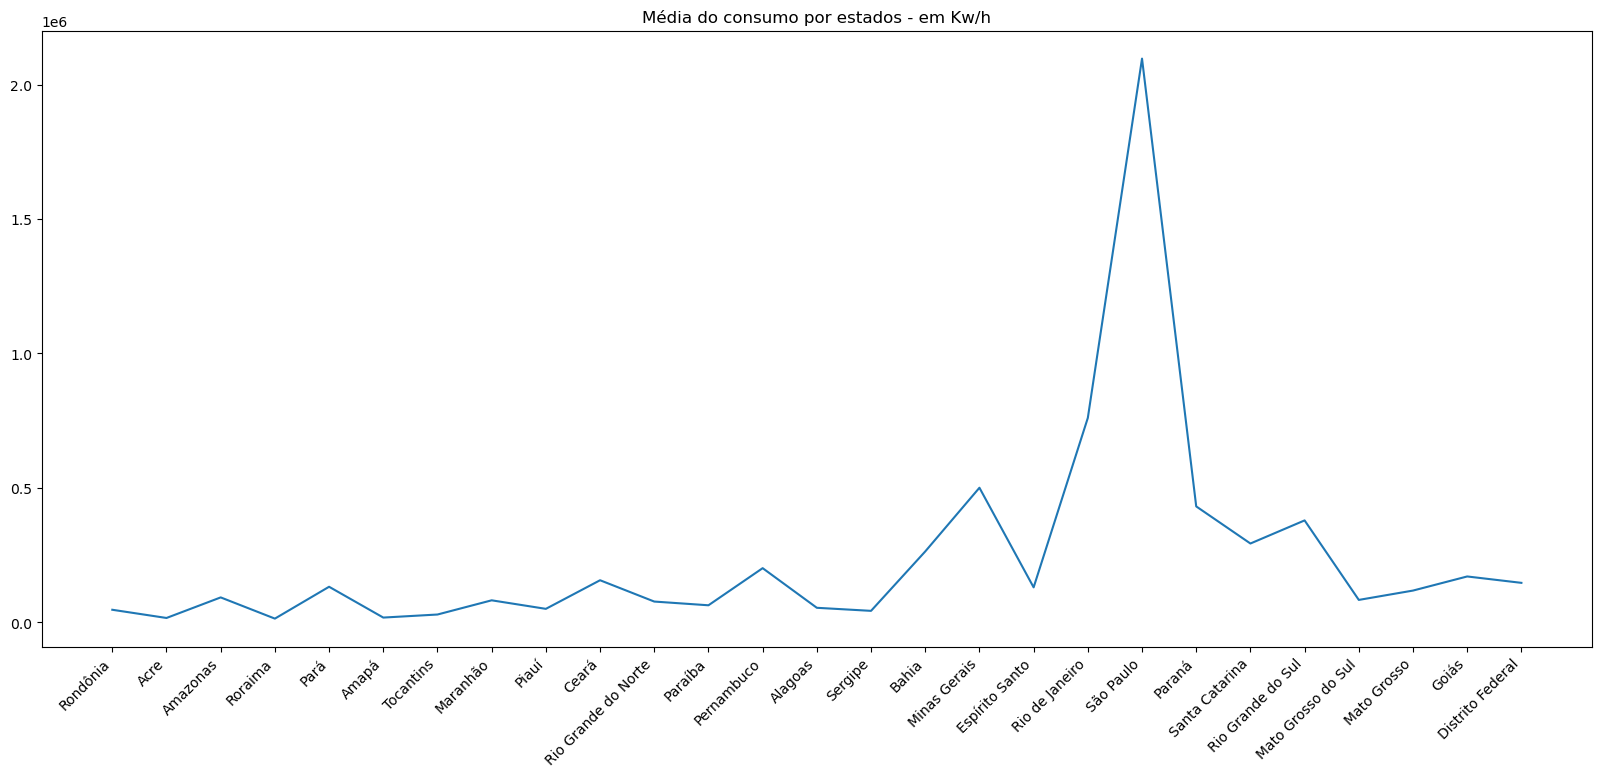

In [52]:
figura = plt.figure(figsize = (20, 8))

plt.plot(df_residencial_processed.mean())
plt.xticks(rotation = 45, ha = 'right')
plt.title("Média do consumo por estados - em Kw/h")

plt.show()

## Criando os Modelos

## Treinando os Modelos

## Resultados dos Modelos

### Testes

### Qualidade dos Testes e Resultados

## Discussão

A discussão vai aqui